<a href="https://colab.research.google.com/github/ayanghosh1/Ayan-Ghosh-/blob/main/CIFAR-100%20Datset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [37]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [38]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [29]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [39]:
classes = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
           "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
           "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
           "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "computer",
           "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
           "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
           "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose",
           "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar",
           "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout",
           "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

In [40]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

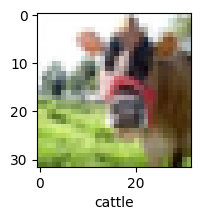

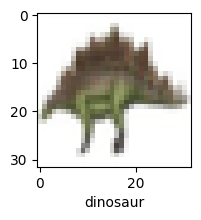

In [41]:
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [55]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(2000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='softmax')
])

In [56]:
ann.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [52]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 240s 153ms/step - loss: 4.1120 - accuracy: 0.0805
Epoch 2/10
1563/1563 [==============================] - 242s 155ms/step - loss: 3.7038 - accuracy: 0.1435
Epoch 3/10
1563/1563 [==============================] - 235s 150ms/step - loss: 3.5358 - accuracy: 0.1727
Epoch 4/10
1563/1563 [==============================] - 234s 149ms/step - loss: 3.4156 - accuracy: 0.1962
Epoch 5/10
1563/1563 [==============================] - 243s 155ms/step - loss: 3.3166 - accuracy: 0.2124
Epoch 6/10
1563/1563 [==============================] - 227s 145ms/step - loss: 3.2280 - accuracy: 0.2298
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 3.1486 - accuracy: 0.2418
Epoch 8/10
1563/1563 [==============================] - 226s 145ms/step - loss: 3.0755 - accuracy: 0.2573
Epoch 9/10
1563/1563 [==============================] - 227s 145ms/step - loss: 3.0058 - accuracy: 0.2693
Epoch 10/10
1563/1563 [=======================

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [57]:
y_pred_ann = ann.predict(X_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]
print("Classification Report (ANN):\n", classification_report(y_test, y_pred_classes_ann))


313/313 [==============================] - 14s 43ms/step
Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.01      0.01      0.01       100
           6       0.00      0.00      0.00       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 64s 40ms/step - loss: 2.2786 - accuracy: 0.4041
Epoch 2/20
1563/1563 [==============================] - 62s 40ms/step - loss: 2.2313 - accuracy: 0.4141
Epoch 3/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1913 - accuracy: 0.4211
Epoch 4/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1502 - accuracy: 0.4304
Epoch 5/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1174 - accuracy: 0.4374
Epoch 6/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.0772 - accuracy: 0.4453
Epoch 7/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.0465 - accuracy: 0.4527
Epoch 8/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.0103 - accuracy: 0.4620
Epoch 9/20
1563/1563 [==============================] - 63s 40ms/step - loss: 1.9825 - accuracy: 0.4690
Epoch 10/20
1563/1563 [==============================] - 66s 42m

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
print("Classification Report (CNN):\n", classification_report(y_test, y_pred_classes_cnn))